## Build Weaver Network

In [38]:
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import os
import numpy as np

In [48]:
G = nx.Graph()

with open('aves-weaver-social-16.edges', 'r') as f:
    lines = f.readlines()

    for line in lines:
        first_animal = line.split(' ')[0]
        second_animal = line.split(' ')[1].split('\n')[0]
        
        G.add_edge(first_animal, second_animal, weight=1)
 

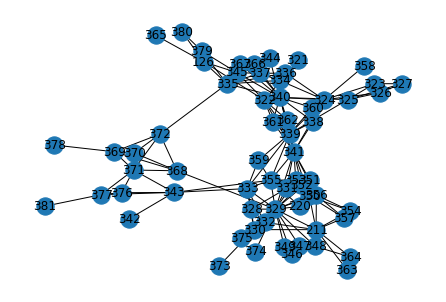

In [20]:
nx.draw(G, with_labels=True)
plt.savefig(f"network.jpg")

In [49]:
print('nx.info:',nx.info(G))  # 返回圖的基本資訊
print('nx.degree:',nx.degree(G))  # 返回圖中各頂點的度
print('nx.density:',nx.degree_histogram(G))  # 返回圖中度的分佈
print('nx.pagerank:',nx.pagerank(G))  # 返回圖中各頂點的頻率分佈

nx.info: Graph with 64 nodes and 177 edges
nx.degree: [('321', 1), ('322', 8), ('323', 4), ('324', 10), ('325', 5), ('326', 4), ('327', 3), ('328', 5), ('329', 21), ('330', 6), ('331', 9), ('332', 6), ('333', 8), ('334', 4), ('335', 10), ('336', 4), ('337', 6), ('338', 4), ('339', 12), ('340', 15), ('341', 15), ('342', 1), ('343', 6), ('344', 3), ('345', 7), ('346', 4), ('347', 4), ('348', 6), ('349', 4), ('350', 12), ('351', 8), ('352', 8), ('353', 8), ('211', 10), ('354', 4), ('220', 4), ('355', 13), ('356', 12), ('357', 4), ('358', 1), ('359', 3), ('360', 3), ('361', 5), ('362', 5), ('363', 1), ('364', 2), ('365', 1), ('126', 6), ('366', 2), ('367', 2), ('368', 5), ('369', 5), ('370', 4), ('371', 7), ('372', 5), ('373', 1), ('374', 1), ('375', 2), ('376', 3), ('377', 4), ('378', 1), ('379', 4), ('380', 2), ('381', 1)]
nx.density: [0, 9, 5, 5, 14, 7, 6, 2, 5, 1, 3, 0, 3, 1, 0, 2, 0, 0, 0, 0, 0, 1]
nx.pagerank: {'321': 0.004736535433101845, '322': 0.022520028909051998, '323': 0.013108

/var/folders/4p/slhgkvrd09356dhy7fljlz280000gn/T/ipykernel_92051/3354505929.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print('nx.info:',nx.info(G))  # 返回圖的基本資訊


## Small World Phenomenon 

In [50]:
# -------- Average Shortest Path Length ----------
a = nx.average_shortest_path_length(G)
print(a)

3.0436507936507935


## Transitivity

In [32]:
transitivity = nx.transitivity(G)
print(transitivity)

0.4775323686214775


## Degree Distribution

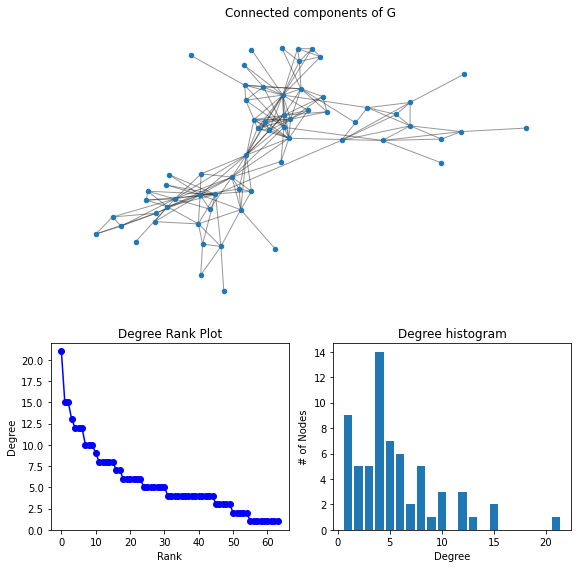

<Figure size 432x288 with 0 Axes>

In [55]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()
plt.savefig(f"degree_distribution.jpg")

## Degree Correlations

In [56]:
r = nx.degree_pearson_correlation_coefficient(G)
print(r)

-0.02905205054211867


## Community Detection (Louvain Algorithm)

In [60]:
import networkx as nx
import numpy as np
from community import community_louvain
import matplotlib.pyplot as plt
import matplotlib.cm as cm

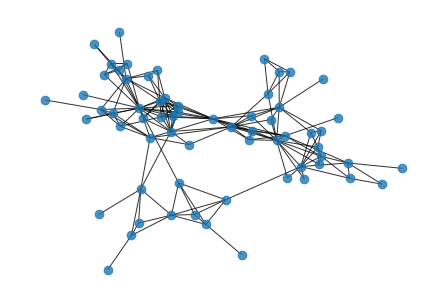

In [58]:
pos = nx.spring_layout(G)
nx.draw(G, pos, node_size = 75, alpha = 0.8)
plt.show()

In [61]:
partition = community_louvain.best_partition(G)

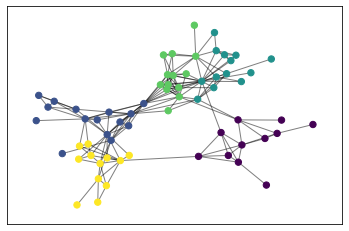

In [62]:
# draw the graph
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [69]:
print((partition))

{'321': 1, '322': 1, '323': 1, '324': 1, '325': 1, '326': 1, '327': 1, '328': 2, '329': 2, '330': 2, '331': 3, '332': 2, '333': 2, '334': 4, '335': 4, '336': 4, '337': 4, '338': 1, '339': 1, '340': 1, '341': 1, '342': 0, '343': 0, '344': 4, '345': 4, '346': 2, '347': 2, '348': 2, '349': 2, '350': 3, '351': 3, '352': 3, '353': 3, '211': 3, '354': 3, '220': 3, '355': 3, '356': 3, '357': 3, '358': 1, '359': 3, '360': 1, '361': 1, '362': 1, '363': 3, '364': 2, '365': 4, '126': 4, '366': 4, '367': 4, '368': 0, '369': 0, '370': 0, '371': 0, '372': 0, '373': 2, '374': 2, '375': 2, '376': 0, '377': 0, '378': 0, '379': 4, '380': 4, '381': 0}
